# Gather

In [1]:
import numpy as np
import pandas as pd
import requests
import tweepy
import json
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# WeRateDogs Twitter archive
df_tw_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Get Tweet image predictions
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(url.split('/')[-1], mode='wb') as file:
    file.write(response.content)
    
df_tw_img_preds = pd.read_csv('image-predictions.tsv', sep='\t')

In [5]:
# Get data from Twitter API
consumer_key = '<consumer_key>'
consumer_secret = '<consumer_secret>'
access_token = '<access_token>'
access_secret = '<access_secret>'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

tweet_list = df_tw_archive['tweet_id']
count = 0

for tweet in tweet_list:
    count += 1
    print(f"time: {time.time()}, count: {count}, tweet: {tweet}")
    
    try:
        tweet = api.get_status(tweet, tweet_mode='extended', wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
    
        temp_dict = {
            'id': tweet._json['id'],
            'retweet_count': tweet._json['retweet_count'],
            'favorite_count': tweet._json['favorite_count']
        }

        with open('tweet_json.txt', 'a') as outfile:
            json.dump(temp_dict, outfile)
            outfile.write('\n')
    except tweepy.TweepError as twe:
        print(f"tweet ID {tweet} call failed with error: {twe}")

time: 1622186732.6349642, count: 1, tweet: 892420643555336193
time: 1622186732.8402493, count: 2, tweet: 892177421306343426
time: 1622186732.9955966, count: 3, tweet: 891815181378084864
time: 1622186733.2062316, count: 4, tweet: 891689557279858688
time: 1622186733.4159696, count: 5, tweet: 891327558926688256
time: 1622186733.5712004, count: 6, tweet: 891087950875897856
time: 1622186733.7310693, count: 7, tweet: 890971913173991426
time: 1622186733.8857532, count: 8, tweet: 890729181411237888
time: 1622186734.0916176, count: 9, tweet: 890609185150312448
time: 1622186734.3037436, count: 10, tweet: 890240255349198849
time: 1622186734.4897382, count: 11, tweet: 890006608113172480
time: 1622186734.6484227, count: 12, tweet: 889880896479866881
time: 1622186734.8064194, count: 13, tweet: 889665388333682689
time: 1622186734.962195, count: 14, tweet: 889638837579907072
time: 1622186735.121332, count: 15, tweet: 889531135344209921
time: 1622186735.2783623, count: 16, tweet: 889278841981685760
tim

In [6]:
with open('tweet_json.txt', 'r') as file:
    lines = file.readlines()
    
    list_tw_api = list()
    
    for line in lines:
        data = json.loads(line)
        temp_dict = {
            'id': data['id'],
            'retweet_count': data['retweet_count'],
            'favorite_count': data['favorite_count']
        }
        list_tw_api.append(temp_dict)
        
df_tw_api = pd.DataFrame(list_tw_api)

# Assess

In [7]:
# Assess WeRateDogs Twitter archive
df_tw_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
df_tw_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
print(df_tw_archive['floofer'].value_counts())
print(df_tw_archive['pupper'].value_counts())
print(df_tw_archive['puppo'].value_counts())
print(df_tw_archive['doggo'].value_counts())

None       2346
floofer      10
Name: floofer, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64
None     2259
doggo      97
Name: doggo, dtype: int64


In [10]:
df_tw_archive[df_tw_archive['retweeted_status_id'].notna() == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [11]:
df_tw_archive[df_tw_archive['in_reply_to_status_id'].notna() == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [12]:
df_tw_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [13]:
df_tw_archive[df_tw_archive['rating_numerator'] >= 15]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
285,838916489579200512,NaN,NaN,2017-03-07 00:57:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @KibaDva: I collected all the good dogs!! 1...,8.389060e+17,8.117408e+08,2017-03-07 00:15:46 +0000,https://twitter.com/KibaDva/status/83890598062...,15,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
291,838085839343206401,8.380855e+17,2.894131e+09,2017-03-04 17:56:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@bragg6of8 @Andy_Pace_ we are still looking fo...,NaN,NaN,NaN,NaN,15,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None


In [14]:
df_tw_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [15]:
df_tw_archive.query('rating_denominator == 2')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [16]:
# Assess Tweet image predictions
df_tw_img_preds.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [17]:
df_tw_img_preds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
df_tw_img_preds['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [19]:
df_tw_img_preds.groupby(['p1', 'p1_dog'])['tweet_id'].count().sort_values(ascending=False)

p1                         p1_dog
golden_retriever           True      150
Labrador_retriever         True      100
Pembroke                   True       89
Chihuahua                  True       83
pug                        True       57
chow                       True       44
Samoyed                    True       43
toy_poodle                 True       39
Pomeranian                 True       38
malamute                   True       30
cocker_spaniel             True       30
French_bulldog             True       26
miniature_pinscher         True       23
Chesapeake_Bay_retriever   True       23
seat_belt                  False      22
Siberian_husky             True       20
Staffordshire_bullterrier  True       20
German_shepherd            True       20
Cardigan                   True       19
web_site                   False      19
Shetland_sheepdog          True       18
Eskimo_dog                 True       18
beagle                     True       18
Maltese_dog            

In [20]:
df_tw_img_preds.groupby(['p2', 'p2_dog'])['tweet_id'].count().sort_values(ascending=False)

p2                              p2_dog
Labrador_retriever              True      104
golden_retriever                True       92
Cardigan                        True       73
Chihuahua                       True       44
Pomeranian                      True       42
French_bulldog                  True       41
Chesapeake_Bay_retriever        True       41
toy_poodle                      True       37
cocker_spaniel                  True       34
Siberian_husky                  True       33
miniature_poodle                True       33
beagle                          True       28
collie                          True       27
Pembroke                        True       27
Eskimo_dog                      True       27
kuvasz                          True       26
Italian_greyhound               True       22
American_Staffordshire_terrier  True       21
Pekinese                        True       21
Samoyed                         True       20
toy_terrier                     True     

In [21]:
df_tw_img_preds.groupby(['p3', 'p3_dog'])['tweet_id'].count().sort_values(ascending=False)

p3                              p3_dog
Labrador_retriever              True      79
Chihuahua                       True      58
golden_retriever                True      48
Eskimo_dog                      True      38
kelpie                          True      35
kuvasz                          True      34
Staffordshire_bullterrier       True      32
chow                            True      32
cocker_spaniel                  True      31
beagle                          True      31
Pekinese                        True      29
Pomeranian                      True      29
toy_poodle                      True      29
Chesapeake_Bay_retriever        True      27
Pembroke                        True      27
Great_Pyrenees                  True      27
malamute                        True      26
French_bulldog                  True      26
American_Staffordshire_terrier  True      24
Cardigan                        True      23
pug                             True      23
basenji         

In [22]:
# Assess Twitter API data
df_tw_api.head()

,favorite_count,id,retweet_count
0,35388,892420643555336193,7472
1,30631,892177421306343426,5545
2,23039,891815181378084864,3670
3,38679,891689557279858688,7647
4,36962,891327558926688256,8248


In [23]:
df_tw_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4661 entries, 0 to 4660
Data columns (total 3 columns):
favorite_count    4661 non-null int64
id                4661 non-null int64
retweet_count     4661 non-null int64
dtypes: int64(3)
memory usage: 109.3 KB


## Quality

### WeRateDogs Twitter archive (df_tw_archive)
1. Statuses where retweeted_status_id or in_reply_to_status_id are not null, are not original ratings.
2. Timestamp column should be datetime data type. Also, data in floofer column should be boolean data type.
3. When the status has other numbers separated by slashes, these are incorrectly captured as the rating. Tweet ID's where this happened: 740373189193256964, 682962037429899265, 666287406224695296, 810984652412424192.
4. When the status uses a float for the rating, the rating_numerator is captured incorrectly. Tweet ID's where this happened: 778027034220126208, 680494726643068929, 786709082849828864.
5. Tweets with a rating_denominator greater than 10 are for statuses with multiple dogs.

### Tweet image predictions (df_tw_img_preds)
6. img_num column should be category data type.
7. If p1_dog, p2_dog, or p3_dog are False, the predicted dog breed is invalid for our analysis.
8. p1, p2, and p3 columns have inconsistent capitalization.

## Tidiness

### WeRateDogs Twitter archive (df_tw_archive)
Pupper, puppo, and doggo info in separate columns.

### Twitter API data (df_tw_api)
The data in df_tw_api should be in df_tw_archive.

### Image predictions (df_tw_img_preds)
The data in df_tw_img_preds should also be in df_tw_archive.

# Clean

In [24]:
df_tw_archive_clean = df_tw_archive.copy()
df_tw_img_preds_clean = df_tw_img_preds.copy()
df_tw_api_clean = df_tw_api.copy()

## Tidiness

### WeRateDogs Twitter archive - pupper/puppo/doggo columns
#### Define
Add a new column called dog_stage, which will list whether the dog is a doggo/puppo/pupper. If a dog doesn't have any of these stages, set dog_stage to 'other.'

#### Code

In [25]:
# The approach below was chosen over the melt method. Melt resulted in extra rows, as some dogs were classified as a doggo and either puppo or pupper.
# Combine the contents of doggo, pupper, and puppo, then remove the None part. This is dog_stage.
df_tw_archive_clean['dog_stage'] = df_tw_archive_clean['doggo'] + ", " + df_tw_archive_clean['pupper'] + ", " + df_tw_archive_clean['puppo']
df_tw_archive_clean['dog_stage'] = df_tw_archive_clean['dog_stage'].str.replace('None, ', '')
df_tw_archive_clean['dog_stage'] = df_tw_archive_clean['dog_stage'].str.replace(', None', '')
df_tw_archive_clean.loc[df_tw_archive_clean['dog_stage'] == 'None', 'dog_stage'] = 'other'
df_tw_archive_clean.drop(['doggo', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [26]:
df_tw_archive_clean['dog_stage'].value_counts()

other            1985
pupper            245
doggo              84
puppo              29
doggo, pupper      12
doggo, puppo        1
Name: dog_stage, dtype: int64

In [27]:
# Confirm same number of rows as the original df_tw_archive dataframe
df_tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
floofer                       2356 non-null object
dog_stage                     2356 non-null object
dtypes: float64(4), int64(3), object(8)
memory usage: 276.2+ KB


### Twitter API data - Should be in original Twitter archive data set
#### Define
1. Join df_twitter_api_clean to df_tw_archive_clean
2. Drop the id column
3. Cast favorite_count and retweet_count as int again

#### Code

In [28]:
df_tw_archive_api = df_tw_archive_clean.merge(df_tw_api_clean, left_on='tweet_id', right_on='id', how='left')

df_tw_archive_api.drop(['id'], axis=1, inplace=True)

df_tw_archive_api.loc[df_tw_archive_api['favorite_count'].isnull(), 'favorite_count'] = 0
df_tw_archive_api.loc[df_tw_archive_api['retweet_count'].isnull(), 'retweet_count'] = 0

df_tw_archive_api['favorite_count'] = df_tw_archive_api['favorite_count'].astype(int)
df_tw_archive_api['retweet_count'] = df_tw_archive_api['retweet_count'].astype(int)

#### Test

In [29]:
df_tw_archive_api.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4686 entries, 0 to 4685
Data columns (total 17 columns):
tweet_id                      4686 non-null int64
in_reply_to_status_id         156 non-null float64
in_reply_to_user_id           156 non-null float64
timestamp                     4686 non-null object
source                        4686 non-null object
text                          4686 non-null object
retweeted_status_id           343 non-null float64
retweeted_status_user_id      343 non-null float64
retweeted_status_timestamp    343 non-null object
expanded_urls                 4568 non-null object
rating_numerator              4686 non-null int64
rating_denominator            4686 non-null int64
name                          4686 non-null object
floofer                       4686 non-null object
dog_stage                     4686 non-null object
favorite_count                4686 non-null int64
retweet_count                 4686 non-null int64
dtypes: float64(4), int64(5), ob

### Image prediciton data - Should be in the same dataframe as original Twitter archive and API data.
#### Define
Join df_tw_img_preds_clean to df_tw_archive_api

#### Code

In [30]:
df_tw_complete = df_tw_archive_api.merge(df_tw_img_preds_clean, left_on='tweet_id', right_on='tweet_id', how='left')

#### Test

In [31]:
df_tw_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4686 entries, 0 to 4685
Data columns (total 28 columns):
tweet_id                      4686 non-null int64
in_reply_to_status_id         156 non-null float64
in_reply_to_user_id           156 non-null float64
timestamp                     4686 non-null object
source                        4686 non-null object
text                          4686 non-null object
retweeted_status_id           343 non-null float64
retweeted_status_user_id      343 non-null float64
retweeted_status_timestamp    343 non-null object
expanded_urls                 4568 non-null object
rating_numerator              4686 non-null int64
rating_denominator            4686 non-null int64
name                          4686 non-null object
floofer                       4686 non-null object
dog_stage                     4686 non-null object
favorite_count                4686 non-null int64
retweet_count                 4686 non-null int64
jpg_url                       41

## Quality
### Statuses where retweeted_status_id or in_reply_to_status_id are not null, are not original ratings
#### Define
Remove rows that have a retweeted_status_id or in_reply_to_status_id

#### Code

In [32]:
df_tw_complete = df_tw_complete[df_tw_complete['retweeted_status_id'].notna() == False]
df_tw_complete = df_tw_complete[df_tw_complete['in_reply_to_status_id'].notna() == False]

#### Test

In [33]:
df_tw_complete[df_tw_complete['retweeted_status_id'].notna() == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [34]:
df_tw_complete[df_tw_complete['in_reply_to_status_id'].notna() == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [35]:
df_tw_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4187 entries, 0 to 4685
Data columns (total 28 columns):
tweet_id                      4187 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     4187 non-null object
source                        4187 non-null object
text                          4187 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 4181 non-null object
rating_numerator              4187 non-null int64
rating_denominator            4187 non-null int64
name                          4187 non-null object
floofer                       4187 non-null object
dog_stage                     4187 non-null object
favorite_count                4187 non-null int64
retweet_count                 4187 non-null int64
jpg_url                       3935 non-nul

### timestamp column should be datetime data type
#### Define
Use the to_datetime method to change the data type

#### Code

In [36]:
df_tw_complete['timestamp'] = pd.to_datetime(df_tw_complete['timestamp'])

#### Test

In [37]:
df_tw_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4187 entries, 0 to 4685
Data columns (total 28 columns):
tweet_id                      4187 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     4187 non-null datetime64[ns]
source                        4187 non-null object
text                          4187 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 4181 non-null object
rating_numerator              4187 non-null int64
rating_denominator            4187 non-null int64
name                          4187 non-null object
floofer                       4187 non-null object
dog_stage                     4187 non-null object
favorite_count                4187 non-null int64
retweet_count                 4187 non-null int64
jpg_url                       3935

In [38]:
df_tw_complete.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
2,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
3,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
4,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


### Data in floofer column should be boolean data type
#### Define
Create a new column called is_floofer. Set the value to True if the dog is a floofer. Otherwise set it False.

#### Code

In [39]:
df_tw_complete.loc[df_tw_complete['floofer'] == 'floofer', 'is_floofer'] = True
df_tw_complete.loc[df_tw_complete['floofer'] == 'None', 'is_floofer'] = False

#### Test

In [40]:
df_tw_complete.query('is_floofer == True')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,is_floofer
91,883360690899218434,NaN,NaN,2017-07-07 16:22:55,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883360690...,...,chow,0.987997,True,Tibetan_mastiff,0.007099,True,Newfoundland,0.002140,True,True
92,883360690899218434,NaN,NaN,2017-07-07 16:22:55,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883360690...,...,chow,0.987997,True,Tibetan_mastiff,0.007099,True,Newfoundland,0.002140,True,True
392,854010172552949760,NaN,NaN,2017-04-17 16:34:26,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,...,English_springer,0.354733,True,collie,0.177538,True,Border_collie,0.131706,True,True
393,854010172552949760,NaN,NaN,2017-04-17 16:34:26,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,...,English_springer,0.354733,True,collie,0.177538,True,Border_collie,0.131706,True,True
1146,800388270626521089,NaN,NaN,2016-11-20 17:20:08,"<a href=""http://twitter.com/download/iphone"" r...",This is Doc. He takes time out of every day to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/800388270...,...,golden_retriever,0.359860,True,Pembroke,0.194207,True,collie,0.154603,True,True
1147,800388270626521089,NaN,NaN,2016-11-20 17:20:08,"<a href=""http://twitter.com/download/iphone"" r...",This is Doc. He takes time out of every day to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/800388270...,...,golden_retriever,0.359860,True,Pembroke,0.194207,True,collie,0.154603,True,True
1529,776218204058357768,NaN,NaN,2016-09-15 00:36:55,"<a href=""http://twitter.com/download/iphone"" r...",Atlas rolled around in some chalk and now he's...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776218204...,...,Samoyed,0.940326,True,Pomeranian,0.055527,True,keeshond,0.002226,True,True
1530,776218204058357768,NaN,NaN,2016-09-15 00:36:55,"<a href=""http://twitter.com/download/iphone"" r...",Atlas rolled around in some chalk and now he's...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776218204...,...,Samoyed,0.940326,True,Pomeranian,0.055527,True,keeshond,0.002226,True,True
1943,749317047558017024,NaN,NaN,2016-07-02 19:01:20,"<a href=""http://twitter.com/download/iphone"" r...",This is Blu. He's a wild bush Floofer. I wish ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749317047...,...,wire-haired_fox_terrier,0.155144,True,Lakeland_terrier,0.108382,True,buckeye,0.074617,False,True
1944,749317047558017024,NaN,NaN,2016-07-02 19:01:20,"<a href=""http://twitter.com/download/iphone"" r...",This is Blu. He's a wild bush Floofer. I wish ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749317047...,...,wire-haired_fox_terrier,0.155144,True,Lakeland_terrier,0.108382,True,buckeye,0.074617,False,True


In [41]:
df_tw_complete.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,is_floofer
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,False
1,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,False
2,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,False
3,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,False
4,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,False


### When the status has other numbers separated by slashes, these are incorrectly captured as the rating
#### Define
1. Manually correct the rating for these tweet ID's: 740373189193256964, 682962037429899265, 666287406224695296
2. Remove tweet ID 810984652412424192, as it does not have a rating

#### Code

In [42]:
df_tw_complete.loc[df_tw_complete['tweet_id'] == 740373189193256964, 'rating_numerator'] = 14
df_tw_complete.loc[df_tw_complete['tweet_id'] == 682962037429899265, 'rating_numerator'] = 10
df_tw_complete.loc[df_tw_complete['tweet_id'] == 666287406224695296, 'rating_numerator'] = 9
df_tw_complete.loc[df_tw_complete['tweet_id'] == 666287406224695296, 'rating_denominator'] = 10

In [43]:
df_tw_complete = df_tw_complete.query('tweet_id != 810984652412424192')

#### Test

In [44]:
print(df_tw_complete.loc[df_tw_complete['tweet_id'] == 740373189193256964, 'rating_numerator'])
print(df_tw_complete.loc[df_tw_complete['tweet_id'] == 682962037429899265, 'rating_numerator'])
print(df_tw_complete.loc[df_tw_complete['tweet_id'] == 666287406224695296, 'rating_numerator'])
print(df_tw_complete.loc[df_tw_complete['tweet_id'] == 666287406224695296, 'rating_denominator'])

2111    14
2112    14
Name: rating_numerator, dtype: int64
3299    10
3300    10
Name: rating_numerator, dtype: int64
4644    9
4645    9
Name: rating_numerator, dtype: int64
4644    10
4645    10
Name: rating_denominator, dtype: int64


In [45]:
df_tw_complete.query('tweet_id == 810984652412424192')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,is_floofer


### When the status uses a float for the rating, the rating_numerator is captured incorrectly
#### Define
Manually correct the rating for these tweet ID's: 778027034220126208, 680494726643068929, 786709082849828864.

#### Code

In [46]:
df_tw_complete.loc[df_tw_complete['tweet_id'] == 778027034220126208, 'rating_numerator'] = 11
df_tw_complete.loc[df_tw_complete['tweet_id'] == 680494726643068929, 'rating_numerator'] = 11
df_tw_complete.loc[df_tw_complete['tweet_id'] == 786709082849828864, 'rating_numerator'] = 10

#### Test

In [47]:
print(df_tw_complete.loc[df_tw_complete['tweet_id'] == 778027034220126208, 'rating_numerator'])
print(df_tw_complete.loc[df_tw_complete['tweet_id'] == 680494726643068929, 'rating_numerator'])
print(df_tw_complete.loc[df_tw_complete['tweet_id'] == 786709082849828864, 'rating_numerator'])

1507    11
1508    11
Name: rating_numerator, dtype: int64
3399    11
3400    11
Name: rating_numerator, dtype: int64
1372    10
1373    10
Name: rating_numerator, dtype: int64


### Tweets with a rating_denominator greater than 10 are for statuses with multiple dogs
#### Define
Remove tweet ID's where rating_denominator is greater than 10.

#### Code

In [48]:
df_tw_complete = df_tw_complete.query('rating_denominator <= 10')

#### Test

In [49]:
df_tw_complete['rating_denominator'].value_counts()

10    4155
Name: rating_denominator, dtype: int64

### img_num column should be category data type
#### Define
Use pandas astype method to change data type

#### Code

In [50]:
df_tw_complete['img_num'] = df_tw_complete['img_num'].astype('category')

#### Test

In [51]:
df_tw_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4155 entries, 0 to 4685
Data columns (total 29 columns):
tweet_id                      4155 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     4155 non-null datetime64[ns]
source                        4155 non-null object
text                          4155 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 4149 non-null object
rating_numerator              4155 non-null int64
rating_denominator            4155 non-null int64
name                          4155 non-null object
floofer                       4155 non-null object
dog_stage                     4155 non-null object
favorite_count                4155 non-null int64
retweet_count                 4155 non-null int64
jpg_url                       3903

### If p1_dog, p2_dog, or p3_dog are False, the predicted dog breed is invalid for our analysis.
#### Define
Filter on rows with invalid dog breed names. Replace the breed name with NaN.

#### Code

In [52]:
df_tw_complete.loc[df_tw_complete['p1_dog'] == False, 'p1'] = np.nan
df_tw_complete.loc[df_tw_complete['p2_dog'] == False, 'p2'] = np.nan
df_tw_complete.loc[df_tw_complete['p3_dog'] == False, 'p3'] = np.nan

#### Test

In [53]:
df_tw_complete.query('p1_dog == False')['p1']

0       NaN
1       NaN
6       NaN
7       NaN
43      NaN
44      NaN
55      NaN
56      NaN
103     NaN
104     NaN
113     NaN
114     NaN
115     NaN
116     NaN
133     NaN
134     NaN
137     NaN
138     NaN
206     NaN
207     NaN
220     NaN
221     NaN
230     NaN
231     NaN
241     NaN
242     NaN
276     NaN
277     NaN
282     NaN
283     NaN
       ... 
4578    NaN
4579    NaN
4580    NaN
4581    NaN
4582    NaN
4583    NaN
4584    NaN
4585    NaN
4594    NaN
4595    NaN
4598    NaN
4599    NaN
4618    NaN
4619    NaN
4626    NaN
4627    NaN
4634    NaN
4635    NaN
4640    NaN
4641    NaN
4642    NaN
4643    NaN
4648    NaN
4649    NaN
4650    NaN
4651    NaN
4668    NaN
4669    NaN
4672    NaN
4673    NaN
Name: p1, Length: 1010, dtype: object

In [54]:
df_tw_complete.query('p2_dog == False')['p2']

0       NaN
1       NaN
43      NaN
44      NaN
47      NaN
48      NaN
55      NaN
56      NaN
61      NaN
62      NaN
103     NaN
104     NaN
111     NaN
112     NaN
113     NaN
114     NaN
115     NaN
116     NaN
121     NaN
122     NaN
137     NaN
138     NaN
218     NaN
219     NaN
220     NaN
221     NaN
230     NaN
231     NaN
276     NaN
277     NaN
       ... 
4544    NaN
4545    NaN
4572    NaN
4573    NaN
4578    NaN
4579    NaN
4582    NaN
4583    NaN
4584    NaN
4585    NaN
4588    NaN
4589    NaN
4594    NaN
4595    NaN
4616    NaN
4617    NaN
4626    NaN
4627    NaN
4634    NaN
4635    NaN
4642    NaN
4643    NaN
4648    NaN
4649    NaN
4650    NaN
4651    NaN
4668    NaN
4669    NaN
4672    NaN
4673    NaN
Name: p2, Length: 978, dtype: object

In [55]:
df_tw_complete.query('p3_dog == False')['p3']

0       NaN
1       NaN
6       NaN
7       NaN
10      NaN
11      NaN
12      NaN
13      NaN
22      NaN
23      NaN
43      NaN
44      NaN
51      NaN
52      NaN
55      NaN
56      NaN
61      NaN
62      NaN
95      NaN
96      NaN
105     NaN
106     NaN
111     NaN
112     NaN
113     NaN
114     NaN
115     NaN
116     NaN
129     NaN
130     NaN
       ... 
4578    NaN
4579    NaN
4580    NaN
4581    NaN
4582    NaN
4583    NaN
4584    NaN
4585    NaN
4586    NaN
4587    NaN
4594    NaN
4595    NaN
4616    NaN
4617    NaN
4618    NaN
4619    NaN
4626    NaN
4627    NaN
4634    NaN
4635    NaN
4642    NaN
4643    NaN
4648    NaN
4649    NaN
4650    NaN
4651    NaN
4670    NaN
4671    NaN
4672    NaN
4673    NaN
Name: p3, Length: 1074, dtype: object

### p1, p2, and p3 columns have inconsistent capitalization
#### Define
Replace underscores with spaces, then user pandas str.title method to capitalize the first word in the p1, p2, and p3 columns.

#### Code

In [56]:
df_tw_complete['p1'] = df_tw_complete['p1'].str.replace('_', ' ', regex=False)
df_tw_complete['p1'] = df_tw_complete['p1'].str.title()

df_tw_complete['p2'] = df_tw_complete['p2'].str.replace('_', ' ', regex=False)
df_tw_complete['p2'] = df_tw_complete['p2'].str.title()

df_tw_complete['p3'] = df_tw_complete['p3'].str.replace('_', ' ', regex=False)
df_tw_complete['p3'] = df_tw_complete['p3'].str.title()

#### Test

In [57]:
df_tw_complete['p1'].value_counts()

Golden Retriever              268
Labrador Retriever            180
Pembroke                      176
Chihuahua                     156
Pug                           108
Chow                           82
Samoyed                        79
Pomeranian                     76
Toy Poodle                     73
Malamute                       58
Cocker Spaniel                 54
French Bulldog                 51
Chesapeake Bay Retriever       46
Miniature Pinscher             42
German Shepherd                40
Siberian Husky                 38
Staffordshire Bullterrier      37
Maltese Dog                    36
Eskimo Dog                     36
Shetland Sheepdog              36
Shih-Tzu                       34
Beagle                         34
Cardigan                       34
Italian Greyhound              32
Rottweiler                     32
Lakeland Terrier               30
Kuvasz                         30
Great Pyrenees                 26
Basset                         26
Pekinese      

In [58]:
df_tw_complete['p2'].value_counts()

Labrador Retriever                190
Golden Retriever                  159
Cardigan                          144
Chihuahua                          82
Chesapeake Bay Retriever           80
French Bulldog                     78
Pomeranian                         76
Toy Poodle                         72
Siberian Husky                     66
Miniature Poodle                   64
Cocker Spaniel                     60
Eskimo Dog                         54
Beagle                             54
Collie                             52
Pembroke                           48
Italian Greyhound                  44
Pekinese                           42
Kuvasz                             42
Miniature Pinscher                 40
Chow                               40
Malinois                           40
American Staffordshire Terrier     39
Norwegian Elkhound                 38
Toy Terrier                        38
Boston Bull                        37
Samoyed                            34
Pug         

In [59]:
df_tw_complete['p3'].value_counts()

Labrador Retriever                148
Chihuahua                         114
Golden Retriever                   88
Eskimo Dog                         70
Kelpie                             66
Kuvasz                             62
Staffordshire Bullterrier          60
Chow                               58
Toy Poodle                         58
Beagle                             57
Cocker Spaniel                     57
Pekinese                           56
Pomeranian                         53
Pembroke                           52
Great Pyrenees                     50
Malamute                           50
French Bulldog                     50
Cardigan                           46
Chesapeake Bay Retriever           46
American Staffordshire Terrier     44
Pug                                40
Basenji                            40
Siberian Husky                     38
Bull Mastiff                       38
Toy Terrier                        36
Boston Bull                        34
Shetland She

# Store

In [60]:
df_tw_complete.to_csv('twitter_archive_master.csv', index=False)

# Analyze

In [61]:
df_tw_complete.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)
df_tw_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4155 entries, 0 to 4685
Data columns (total 24 columns):
tweet_id              4155 non-null int64
timestamp             4155 non-null datetime64[ns]
source                4155 non-null object
text                  4155 non-null object
expanded_urls         4149 non-null object
rating_numerator      4155 non-null int64
rating_denominator    4155 non-null int64
name                  4155 non-null object
floofer               4155 non-null object
dog_stage             4155 non-null object
favorite_count        4155 non-null int64
retweet_count         4155 non-null int64
jpg_url               3903 non-null object
img_num               3903 non-null category
p1                    2893 non-null object
p1_conf               3903 non-null float64
p1_dog                3903 non-null object
p2                    2925 non-null object
p2_conf               3903 non-null float64
p2_dog                3903 non-null object
p3                    2829

In [62]:
df_tw_complete['rating_numerator'].value_counts()

12      970
10      873
11      830
13      570
9       306
8       196
7       102
14       76
5        68
6        64
3        38
4        30
2        18
1         8
1776      2
420       2
0         2
Name: rating_numerator, dtype: int64

In [63]:
df_tw_complete = df_tw_complete.query('rating_numerator > 0')
df_tw_complete = df_tw_complete.query('rating_numerator < 420')
df_tw_complete['rating_numerator'].value_counts()

12    970
10    873
11    830
13    570
9     306
8     196
7     102
14     76
5      68
6      64
3      38
4      30
2      18
1       8
Name: rating_numerator, dtype: int64

In [64]:
df_tw_complete['intercept'] = 1

dog_stage_dummies = pd.get_dummies(df_tw_complete['dog_stage'])
df_tw_complete_dummies = df_tw_complete.join(dog_stage_dummies)
df_tw_complete_dummies.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,floofer,dog_stage,...,p3_conf,p3_dog,is_floofer,intercept,doggo,"doggo, pupper","doggo, puppo",other,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,other,...,0.076110,False,False,1,0,0,0,1,0,0
1,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,other,...,0.076110,False,False,1,0,0,0,1,0,0
2,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,other,...,0.068957,True,False,1,0,0,0,1,0,0
3,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,other,...,0.068957,True,False,1,0,0,0,1,0,0
4,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,other,...,0.031379,True,False,1,0,0,0,1,0,0


In [65]:
lm = sm.OLS(df_tw_complete_dummies['favorite_count'], df_tw_complete_dummies[['intercept', 'doggo', 'doggo, pupper', 'doggo, puppo', 'other', 'pupper', 'puppo']])
result = lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         favorite_count   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     27.33
Date:                Fri, 28 May 2021   Prob (F-statistic):           3.80e-32
Time:                        08:04:51   Log-Likelihood:                -44696.
No. Observations:                4149   AIC:                         8.941e+04
Df Residuals:                    4142   BIC:                         8.945e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept      4.971e+16      2e+16      2.487      0.013    1.05e+16    8.89e+16
doggo         -4.971e+16      2e+16     -2.487      0.013   -8.89e+16   -1.05e+16
doggo, pupper -4.971e+16      2e+16     -2.487      0.013   -8.89e+16   -1.05e+16
doggo, puppo  -4.971e+16      2e+16     -2.487      0.013   -8.89e+16   -1.05e+16
other         -4.971e+16      2e+16     -2.487      0.013   -8.89e+16   -1.05e+16
pupper        -4.971e+16      2e+16     -2.487      0.013   -8.89e+16   -1.05e+16
puppo         -4.971e+16      2e+16     -2.487      0.013   -8.89e+16   -1.05e+16
==============================================================================
Omnibus:                     3727.368   Durbin-Watson:                   0.652
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           156534.902
Skew:                           4.215   Prob(JB):                         0.00
Kurtosis:                      31.886   Cond. No.                     3.92e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.77e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Insight 1
p_values are low for 'doggo, puppo', 'other', 'pupper', and 'puppo', so some dog stages do appear to affect the favorite_count. However, r-squared is very low, so a linear model is not a good fit for our data.

In [66]:
df_tw_complete.groupby(by='is_floofer')['rating_numerator', 'favorite_count', 'retweet_count'].mean()

,rating_numerator,favorite_count,retweet_count
is_floofer,,,
False,10.602083,8056.086946,2405.327682
True,11.800000,10337.150000,3439.600000


In [67]:
df_tw_complete.groupby(by='is_floofer')['rating_numerator', 'favorite_count', 'retweet_count'].std()

,rating_numerator,favorite_count,retweet_count
is_floofer,,,
False,2.142525,11782.263490,4235.554872
True,1.005249,8838.359084,4273.335532


## Insight 2
Floofers have similar rating_numerator as non-floofers. It is less clear whether floofers have different favorite_count or retweet_count as non-floofers, as the standard deviation for these metrics is the same order of magnitude as the mean.

In [68]:
df_tw_complete = df_tw_complete.dropna(subset=['p1_conf'])
df_tw_complete['p1_conf'].isna().sum()

0

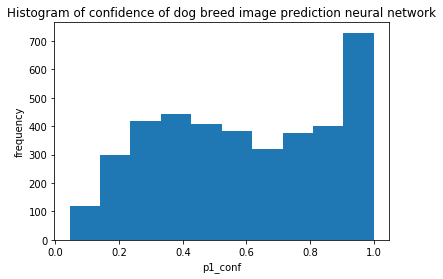

In [69]:
plt.hist(df_tw_complete['p1_conf'], bins=10)
plt.xlabel('p1_conf')
plt.ylabel('frequency')
plt.title('Histogram of confidence of dog breed image prediction neural network')
plt.show()

## Visualization Note
The histogram shows that the dog breed image prediction neural network had varying degrees of confidence. The bin with highest confidence also had highest frequency, which is great to see.

In [70]:
df_tw_complete.query('p1_conf >= 0.95').groupby('p1')['p1'].count().sort_values(ascending=False).head(10)

p1
Pug                   40
Pembroke              38
Samoyed               37
Golden Retriever      32
Pomeranian            26
Chihuahua             18
French Bulldog        16
Labrador Retriever    14
Chow                  14
German Shepherd        8
Name: p1, dtype: int64

## Insight 3
Dog breeds where the image prediction neural network most frequently had high confidence were pug, samoyed, pembroke, and golden retriever.